# Literacy vs Immigrants
Recently, I travelled to Singapore to visit a few university friends and I observed something interesting when I was on Singapore's crazily accessible public transport. There was this kid (which I'm guessing is around the age of 12) carrying an oversized guitar case bag, presumably heading towards training on a Saturday morning alone (it was 10am). It was not the Asian-must-know-music "mandatory" musical instrument training that baffles me, but rather, it was what he googled on his phone that amazes me (I caught a glimpse of his phone by chance, am not a pedophile). 

### "Why does country that has high CO2 emission also have high gdp?" - 12 y.o. kid.

Immediately after, I was thinking "What was I doing when I was 12? Shouldn't kids his age be playing video games? At least I know I was when I was 12". **throwback to Ragnarok Online**.

My thought process was instantly kicked into overdrive. "Is he a second generation immigrant? Where did his parents come from? What kind of upbringing has he gone through?"

<img src="https://previews.123rf.com/images/cofotoisme/cofotoisme1708/cofotoisme170800001/83604248-asian-child-thinking-while-using-smartphone.jpg" style="width: 500px; height: 400px;"/>
<i><center>Image Source: 123rf.com</center></i>

I got interested and wonder...

## Is there a correlation between countries with high adult literacy rate and number of first-generation immigrants?
Statistically speaking, 
<br>
<br>
$H_{0}$ : **There is no significant relationship between country's adult literacy rate and number of first-generation immigrants**

$H_{1}$ : **There is a positive relationship between country's adult literacy rate and number of first-generation immigrants**

## Background
Literacy can generally be defined as individual/groups who can both read and write with understanding a short simple statement on their everyday life. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations.

According to the definition of literacy rate on UNESCO's website (http://uis.unesco.org/en/glossary-term/literacy-rate), there are two categories for literacy rate: <br>
(a) youth literacy rate (between age 15 to 24) and <br>
(b) literacy rate (age 15 and above). 

There are two calculation methods for these categories are fairly straight forward, that are : <br>
(a) divide the number of literates of a given age range by the corresponding age group population and multiply the result by 100; or <br>
(b) derive the illiteracy rate; or by subtracting the literacy rate from 100%

Immigrant can generally be defined as a person who comes to live permanently in a foreign country.

## Data Sourcing/Scraping/Cleaning
The simple hypothesis requires two datasets and can be readily found in the following websites. <br>
(a) Country's adult literacy rate which can be found in (<a href="data.uis.unesco.org">UNESCO Institute of Statistics's website</a>). unfortunately - there are no direct url link to be manipulated. Instead, a .csv file has to be downloaded as follow <br>

<img src="LiteracyCapture.png"/>

(b) Number of foreign-born populations which can be found in (<a href="data.un.org">United Nations Department of Economic and Social Affairs 2015 report Trends in International Migrant Stock: The 2015 Revision</a>) - Specifically, the url link used is (http://data.un.org/Data.aspx?d=POP&f=tableCode%3a44%3brefYear%3a2015&c=2,3,6,8,10,12,14,16,17,18&s=_countryEnglishNameOrderBy:asc,refYear:desc,areaCode:asc&v=1)

In [77]:
# in order to import literacy data, we will be using pandas to extract the information.
# Let's take a peek on what's in the .csv
import pandas as pd

UNESCO_literacy_df = pd.read_csv("EDULIT_DS_24022020012238010.csv")
UNESCO_literacy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6897 entries, 0 to 6896
Data columns (total 9 columns):
EDULIT_IND    6897 non-null object
Indicator     6897 non-null object
LOCATION      6897 non-null object
Country       6897 non-null object
TIME          6897 non-null int64
Time          6897 non-null int64
Value         6897 non-null float64
Flag Codes    1660 non-null object
Flags         1660 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 485.1+ KB


it seems that there are 9 columns of data with 6897 rows. <br>
(a) There are potential missing data in Flag Codes <br>
(b) There are "TIME" and "Time" columns. What are they? <br>
(c) What's EDULIT_IND? What's Indicator?

In [78]:
UNESCO_literacy_df.head(10)

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,LR_AG15T24_GPI,"Youth literacy rate, population 15-24 years, g...",MAR,Morocco,2018,2018,0.99347,‡,UIS Estimation
1,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",40520,Latin America and the Caribbean,2013,2013,97.69499,NaN,NaN
2,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",40520,Latin America and the Caribbean,2014,2014,98.03670,NaN,NaN
3,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",40520,Latin America and the Caribbean,2015,2015,98.10980,NaN,NaN
4,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",40520,Latin America and the Caribbean,2016,2016,98.22810,NaN,NaN
5,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",40520,Latin America and the Caribbean,2017,2017,98.27868,NaN,NaN
6,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",40520,Latin America and the Caribbean,2018,2018,98.35487,NaN,NaN
7,LR_AG65T99_M,"Elderly literacy rate, population 65+ years, m...",BRN,Brunei Darussalam,2018,2018,90.30430,‡,UIS Estimation
8,LR_AG15T24_GPI,"Youth literacy rate, population 15-24 years, g...",DOM,Dominican Republic,2013,2013,1.01540,NaN,NaN
9,LR_AG15T24_GPI,"Youth literacy rate, population 15-24 years, g...",DOM,Dominican Republic,2014,2014,1.00710,NaN,NaN


In [79]:
UNESCO_literacy_df.sample(5)

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
3566,LR_AG25T64,"Literacy rate, population 25-64 years, both se...",ARM,Armenia,2017,2017,99.86315,NaN,NaN
4471,LR_AG25T64_M,"Literacy rate, population 25-64 years, male (%)",ROU,Romania,2018,2018,99.06235,‡,UIS Estimation
6248,LR_AG15T99_F,"Adult literacy rate, population 15+ years, fem...",40612,Asia (Central),2013,2013,99.79970,NaN,NaN
3572,LR_AG25T64,"Literacy rate, population 25-64 years, both se...",AZE,Azerbaijan,2017,2017,99.90473,NaN,NaN
1102,LR_AG15T24_F,"Youth literacy rate, population 15-24 years, f...",SGP,Singapore,2018,2018,99.94237,NaN,NaN


A quick look at the data seems to suggest that <br>
(a) EDULIT_IND is not useful. <br>
(b) Indicator is necessary to match "adult literacy rate" and "15+ years" and "both sexes". <br>
(c) LOCATION can take numerical or alphabets, but numerical digits seem to indicate regional, whereas alphabets seems to indicate country code. <br>
(d) "TIME" and "Time" column are the same <br>
(e) "Value" column is of primary interest <br>
(f) Need more information on Flag Codes and Flags <br>

In [80]:
for index, column in enumerate(UNESCO_literacy_df.columns):
    print(column)
    print(UNESCO_literacy_df[column].unique())

# scan and see if "Time" and "TIME" are the same.
for i in range(len(UNESCO_literacy_df)):
    if (UNESCO_literacy_df["TIME"][i] != UNESCO_literacy_df["Time"][i]):
        print("Nope, they are not the same")

EDULIT_IND
['LR_AG15T24_GPI' 'LR_AG15T24_M' 'LR_AG65T99_M' 'LR_AG15T99_F'
 'LR_AG15T24_F' 'LR_AG15T99_GPI' 'LR_AG15T99' 'LR_AG65T99'
 'LR_AG65T99_GPI' 'LR_AG15T99_M' 'LR_AG15T24' 'LR_AG65T99_F' 'LR_AG25T64'
 'LR_AG25T64_F' 'LR_AG25T64_M' 'LR_AG25T64_GPI']
Indicator
['Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)'
 'Elderly literacy rate, population 65+ years, male (%)'
 'Adult literacy rate, population 15+ years, female (%)'
 'Youth literacy rate, population 15-24 years, female (%)'
 'Adult literacy rate, population 15+ years, gender parity index (GPI)'
 'Adult literacy rate, population 15+ years, both sexes (%)'
 'Elderly literacy rate, population 65+ years, both sexes (%)'
 'Elderly literacy rate, population 65+ years, gender parity index (GPI)'
 'Adult literacy rate, population 15+ years, male (%)'
 'Youth literacy rate, population 15-24 years, both sexes (%)'
 'Elderly literacy rate, population 65+ ye

Upon inspection, we could drop the following columns : EDULIT_IND, Indicator (anything that is not "Adult Literacy Rate, Both Sexes, Age 15+"), Location (anything that is numerical), either "Time" or "TIME" column, Flag Codes and Flags

In [81]:
UNESCO_literacy_df = UNESCO_literacy_df.drop(columns=["EDULIT_IND","Flag Codes", "Flags", "TIME"])
UNESCO_literacy_df = UNESCO_literacy_df[UNESCO_literacy_df["Indicator"] == "Adult literacy rate, population 15+ years, both sexes (%)"]
UNESCO_literacy_df = UNESCO_literacy_df[UNESCO_literacy_df["LOCATION"].apply(lambda x: x.isnumeric()) == False]

In [82]:
UNESCO_literacy_df

,Indicator,LOCATION,Country,Time,Value
43,"Adult literacy rate, population 15+ years, bot...",PAK,Pakistan,2013,55.59499
44,"Adult literacy rate, population 15+ years, bot...",PAK,Pakistan,2014,56.97715
45,"Adult literacy rate, population 15+ years, bot...",PAK,Pakistan,2017,59.13205
67,"Adult literacy rate, population 15+ years, bot...",BRA,Brazil,2013,91.48424
68,"Adult literacy rate, population 15+ years, bot...",BRA,Brazil,2014,91.72943
...,...,...,...,...,...
3456,"Adult literacy rate, population 15+ years, bot...",COG,Congo,2018,80.29876
3536,"Adult literacy rate, population 15+ years, bot...",LBN,Lebanon,2018,95.06944
4614,"Adult literacy rate, population 15+ years, bot...",BRB,Barbados,2014,99.60000
6874,"Adult literacy rate, population 15+ years, bot...",FJI,Fiji,2017,99.08211


Do we have missing value? Let's check !

In [83]:
UNESCO_literacy_df = UNESCO_literacy_df.dropna()
UNESCO_literacy_df

,Indicator,LOCATION,Country,Time,Value
43,"Adult literacy rate, population 15+ years, bot...",PAK,Pakistan,2013,55.59499
44,"Adult literacy rate, population 15+ years, bot...",PAK,Pakistan,2014,56.97715
45,"Adult literacy rate, population 15+ years, bot...",PAK,Pakistan,2017,59.13205
67,"Adult literacy rate, population 15+ years, bot...",BRA,Brazil,2013,91.48424
68,"Adult literacy rate, population 15+ years, bot...",BRA,Brazil,2014,91.72943
...,...,...,...,...,...
3456,"Adult literacy rate, population 15+ years, bot...",COG,Congo,2018,80.29876
3536,"Adult literacy rate, population 15+ years, bot...",LBN,Lebanon,2018,95.06944
4614,"Adult literacy rate, population 15+ years, bot...",BRB,Barbados,2014,99.60000
6874,"Adult literacy rate, population 15+ years, bot...",FJI,Fiji,2017,99.08211


We might not have missing values, but we definitely have missing countries, especially because there are 195 countries and not all countries are or have access to UNESCO state members. For now, we will look at United Nations data to find matching countries in the appropriate year.

In order to look at United Nations data, we could also download the .csv data as well. However, let's view a different way to import data into Jupyter (i.e. using API calls, pagination of URL and scrap data from the HTML file format.

In [24]:
import requests
from bs4 import BeautifulSoup

un_url = "http://data.un.org/Data.aspx?d=POP&f=tableCode%3a44%3brefYear%3a2015&c=2,3,6,8,10,12,14,16,17,18&s=_countryEnglishNameOrderBy:asc,refYear:desc,areaCode:asc&v=1"
response = requests.get(un_url)
soup = BeautifulSoup(response.content,"html.parser")

In [25]:
[type(item) for item in list(soup.children)]

[bs4.element.NavigableString,
 bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag]

In [26]:
# tips and tricks for beautifulsoup
# by using soup.children, we create a list generator. We have to use list to contain items in soup.
# in the list, there are four items 
# (1) '\n', 
# (2) 'html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"', 
# (3) '\n',
# (4) <html xmlns="http://www.w3.org/1999/xhtml">......
# the item in interest is in the fourth item in the list and it is a tag

In [ ]:
interested_nested_tag = list(soup.children)[3] # list(interested_nested_tag.children) yields the whole html ['\n', <head>, ,'\n', <body>, '\n']
interested_nested_nested_tag = list(interested_nested_tag.children)[3] # list(interested_nested_nested_tag yields ['\n',<a name>, '\n', <div class>,'\n',<script>,'\n',<script>,'\n']
interested_nested_nested_tag

the .children method scans down the nested structure, but can take forever to find the desired tag
instead use .findAll("tag","sub-tag"). Remember that .findAll outputs a list iterative, if we want to access individual items, we need to use list

In [28]:
mydivs = soup.find_all("div", {"class": "DataContainer"})
interested_list = mydivs[0].find_all("td")
i=0
print(str(interested_list[(i*10)+i+4]).find("Total"))
print(str(interested_list[26]))

4
<td>Total</td>


For the year 2015, the text above contains 550 items (total of 53924 x 550 records in 2015). Furthermore, this is only 1 page of 1079 pages of the data. The data is structured in such a way that the "Total Foreign-born" is the sum item for each origin-country. This make our live slightly easier as we do not need to process all data and that each row has 11 columns.

Strategy:
(a) always combine 11 items into 1 string
(b) scan and keep string "Total Foreign-born"
(c) repeat for all pages
(d) repeat for different year if necessary

In [29]:
import re
final_page = re.findall('\d+', str(soup.find_all("span",{"id":"spanPageCountB"})))[0]
print("total number of page:", final_page)
final_index = int(len(interested_list)/11)

for i in range(final_index):
    new_interested_list = str(interested_list[(i*10)+i:(i*10)+(10+i)])
    if new_interested_list.find("Total Foreign-born") != -1:
        print(new_interested_list)
        print(re.findall('\d+', new_interested_list))

total number of page: 1079
[<td>French Guiana</td>, <td>2015</td>, <td>Total</td>, <td>Both Sexes</td>, <td>Total</td>, <td>Total Foreign-born</td>, <td>Census - de jure - complete tabulation</td>, <td>Final figure, complete</td>, <td>2019</td>, <td style="text-align:right;border-right: none;">259,865</td>]
['2015', '2019', '259', '865']


Combining every steps...

In [30]:
from ipywidgets import widgets
from IPython.display import display,clear_output
year = widgets.Dropdown(
    options=['2013', '2014', '2015', '2016', '2017', '2018'],
    value='2013',
    description='YEAR:',
    disabled=False,
)
display(year)

Dropdown(description='YEAR:', options=('2013', '2014', '2015', '2016', '2017', '2018'), value='2013')

In [31]:
import re
import requests
from bs4 import BeautifulSoup
import numpy as np

un_url = "http://data.un.org/Data.aspx?d=POP&f=tableCode%3a44%3brefYear%3a" + year.value + "&c=2,3,6,8,10,12,14,16,17,18&s=_countryEnglishNameOrderBy:asc,refYear:desc,areaCode:asc&v=1"
response = requests.get(un_url)
soup = BeautifulSoup(response.content,"html.parser")
final_page = re.findall('\d+', str(soup.find_all("span",{"id":"spanPageCountB"})))[0]
print("total number of page:", final_page)

total number of page: 87


In [32]:
DF_list = []
counter = 0
for i in range(int(final_page)):
    progress = widgets.IntProgress(
    value=i,
    min=0,
    max=final_page,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal')
    un_url = "http://data.un.org/Data.aspx?d=POP&f=tableCode%3a44%3brefYear%3a" + year.value + "&c=2,3,6,8,10,12,14,16,17,18&s=_countryEnglishNameOrderBy:asc,refYear:desc,areaCode:asc&v=" + str(i+1)
    response = requests.get(un_url)
    soup = BeautifulSoup(response.content,"html.parser")
    mydivs = soup.find_all("div", {"class": "DataContainer"})
    interested_list = mydivs[0].find_all("td")
    final_index = int(len(interested_list)/11)
    display(progress)
    clear_output(wait=True)
    for i in range(final_index):
        if (str(interested_list[(i*10)+i+5]).find("Total Foreign-born") != -1) and (str(interested_list[(i*10)+i+4]).find("Total") != -1) and (str(interested_list[(i*10)+i+3]).find("Both Sexes") != -1):
            counter+=1
            value = re.findall("\d+", str(interested_list[(i*10)+i+9]))[0]
            if (len(re.findall("\d+", str(interested_list[(i*10)+i+9]))) >= 2):
                for i in np.arange(1,len(re.findall("\d+", str(interested_list[(i*10)+i+9])))):
                    value = value + re.findall("\d+", str(interested_list[(i*10)+i+9]))[i]
            DF_list.append([str(interested_list[(i*10)+i])[4:-5], str(interested_list[(i*10)+i+1])[4:-5], value])
print(counter)

1


Based on the length of DF_Country_List, there are only 7 countries in 2015 which is too little for our hypothesis. Instead, we have to scour across a few years to build a better dataset. On top of that, scanning thousands of pages takes too long. We will use a multiprocessing approach to speed up the process.

In order to do that we would have to leverage multiprocessing managed list and unfortunately, 

In [33]:
DF_list

[['Benin', '2013', '339648']]

In [37]:
from multiprocessing import Process, Manager
import worker


L=[]
if __name__ == "__main__":
    with Manager() as manager:
        L = manager.list()  # <-- can be shared between processes.
        processes = []
        for i in ["2013", "2014", "2015", "2016", "2017", "2018"]:
            p = Process(target=worker.WorkerScanPages, args=(L,i))  # Passing the list
            p.start()
            processes.append(p)
        for p in processes:
            p.join()
        L=list(L)
print(L)

[['Benin', '2013', '339181'], ['Georgia', '2014', '66230'], ['Peru', '2017', '178878'], ['French Guiana', '2015', '259865'], ['Australia', '2016', '6149388'], ['Guernsey', '2018', '21611'], ['Guinea', '2014', '162147'], ['Maldives', '2014', '63637'], ['Republic of Moldova', '2014', '103604'], ['Guadeloupe', '2015', '397990'], ['Bermuda', '2016', '19332'], ['Kiribati', '2015', '2919'], ['Liechtenstein', '2015', '15740'], ['Reunion', '2015', '37245'], ['Saint Pierre and Miquelon', '2015', '385'], ['Saint-Martin (French part)', '2015', '12507'], ['Canada', '2016', '8219555'], ['Slovenia', '2015', '237616'], ['China, Hong Kong SAR', '2016', '2885092'], ['China, Macao SAR', '2016', '385744'], ['Isle of Man', '2016', '41833']]


In [38]:
DF = pd.DataFrame(L, columns=["Country","Year","Number of Foreign Born"])
DF

,Country,Year,Number of Foreign Born
0,Benin,2013,339181
1,Georgia,2014,66230
2,Peru,2017,178878
3,French Guiana,2015,259865
4,Australia,2016,6149388
5,Guernsey,2018,21611
6,Guinea,2014,162147
7,Maldives,2014,63637
8,Republic of Moldova,2014,103604
9,Guadeloupe,2015,397990


After scouring thousands of United Nation pages for each year, the final census data for each year is extremely low. Not every country reports to United Nation. We will have to merge the data from UNESCO and UN to see if we have enough data. Ideally, 30 data points is a minimum due to central limit theorem. We would also add some data manually due to different naming convention (i.e. UNESCO data has China, Macao Special Administrative Region, whereas UN data has China, Macao SAR)

In [42]:
UNESCO_literacy_df["Country"].unique()

array(['Pakistan', 'Brazil', 'Spain', 'Algeria', 'Malta', 'Lesotho',
       'Azerbaijan', 'Serbia', 'Cambodia', 'Tajikistan', 'South Sudan',
       'New Caledonia', "Côte d'Ivoire", 'Jordan', 'Republic of Moldova',
       "Lao People's Democratic Republic", 'Turkey', 'Angola', 'Malaysia',
       'Bangladesh', 'Rwanda', 'Vanuatu', 'Guinea', 'Indonesia',
       'Georgia', 'Saudi Arabia', 'Slovenia', 'Bosnia and Herzegovina',
       'Portugal', 'Italy', 'Maldives', 'Nepal', 'Madagascar', 'Haiti',
       'Puerto Rico', 'South Africa', 'Burkina Faso', 'Tonga',
       'Iran (Islamic Republic of)', 'Seychelles', 'Kuwait', 'Hungary',
       'Armenia', 'Ethiopia', 'Suriname', 'Romania', 'Uruguay',
       'Montenegro', 'Cameroon', 'Paraguay', 'Costa Rica', 'Bhutan',
       'Mexico', 'Namibia', 'Brunei Darussalam', 'Comoros',
       'Guinea-Bissau', 'Togo', 'Central African Republic', 'India',
       'Palau', 'Senegal', 'Albania', 'Botswana', 'Liberia', 'Egypt',
       'Mali', 'Eritrea', 'Qatar',

In [46]:
print(UNESCO_literacy_df[UNESCO_literacy_df["Country"] == "China, Macao Special Administrative Region"])
print(DF[DF["Country"] == "China, Macao SAR"])

                                              Indicator LOCATION  \
2645  Adult literacy rate, population 15+ years, bot...      MAC   

                                         Country  Time     Value  
2645  China, Macao Special Administrative Region  2016  96.53849  
             Country  Year Number of Foreign Born
19  China, Macao SAR  2016                 385744


In [61]:
merged_df = UNESCO_literacy_df.merge(DF, left_on = "Country", right_on = "Country")
print(merged_df.info())
merged_df = merged_df.astype({'Year': 'int64', 'Number of Foreign Born': 'int64'})
merged_df = merged_df[merged_df.Time == merged_df.Year]
merged_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 7 columns):
Indicator                 14 non-null object
LOCATION                  14 non-null object
Country                   14 non-null object
Time                      14 non-null int64
Value                     14 non-null float64
Year                      14 non-null object
Number of Foreign Born    14 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 896.0+ bytes
None


,Indicator,LOCATION,Country,Time,Value,Year,Number of Foreign Born
0,"Adult literacy rate, population 15+ years, bot...",MDA,Republic of Moldova,2014,99.35989,2014,103604
1,"Adult literacy rate, population 15+ years, bot...",GIN,Guinea,2014,32.00384,2014,162147
2,"Adult literacy rate, population 15+ years, bot...",GEO,Georgia,2014,99.58619,2014,66230
5,"Adult literacy rate, population 15+ years, bot...",MDV,Maldives,2014,98.61012,2014,63637
11,"Adult literacy rate, population 15+ years, bot...",PER,Peru,2017,94.14961,2017,178878


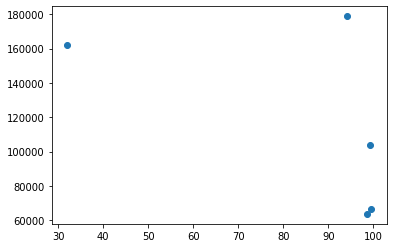

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(merged_df["Value"], merged_df["Number of Foreign Born"])

## Things to do :
1. Identify better source with higher data count
2. Re-examine hypothesis

Organization of Economic Cooperation and Development (OECD) provides a good data source on % of population, which is a better metric as it has been normalized by its population. The specific url is https://data.oecd.org/chart/5Rmq. Furthermore, they have .csv download options if anyone is interested. I will continue to use beautifulsoup and re method (to improve my web scraping skills).

In [ ]:
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import requests

session = HTMLSession()
oecd_url = "https://data.oecd.org/chart/5Rmq"
response = session.get(oecd_url)
soup = BeautifulSoup(response.html.html,"html5lib")
soup
#mytrs = soup.find_all("div", {"class":"table-chart"})
#mytrs


Unfortunately, OECD data is embedded and internally uses API to update the value. Therefore, another alternative is to use a combination of Selenium and Webdriver, to spawn the exact instance of a browser together with its exact html.

In [24]:
from selenium import webdriver

option = webdriver.ChromeOptions()
option.add_argument("--incognito")

browser = webdriver.Chrome(executable_path=r'C:\Users\mcheong\Downloads\chromedriver_win32\chromedriver', chrome_options=option)

browser.get("https://data.oecd.org/chart/5Rmq")
country_element = browser.find_elements_by_class_name('table-chart-tbody-th')
value_element = browser.find_elements_by_class_name('table-chart-td')

c:\users\mcheong\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [41]:
import numpy as np
country_list = []
value_list = []

for i in country_element:
    country_list.append(i.text)
    
for j in np.arange(int(len(value_element)/6)):
    temp_list = [value_element[j*6].text, value_element[(j*6)+1].text, value_element[(j*6)+2].text, value_element[(j*6)+3].text, value_element[(j*6)+4].text, value_element[(j*6)+5].text]
    value_list.append(temp_list)
value_list

[['27.540', '27.814', '28.077', '28.650', '29.200', '29.641'],
 ['16.081', '16.610', '17.375', '18.305', '18.960', '19.392'],
 ['15.676', '15.816', '15.807', '16.281', '16.566', '16.809'],
 ['19.952', '20.108', '20.275', '20.779', '', ''],
 ['2.364', '2.486', '2.593', '', '', ''],
 ['7.063', '7.161', '7.300', '7.523', '', ''],
 ['8.115', '8.430', '8.838', '9.463', '9.952', '10.282'],
 ['15.031', '14.934', '14.831', '14.767', '14.701', '15.014'],
 ['5.235', '5.553', '5.850', '6.127', '6.473', '6.726'],
 ['11.890', '12.032', '12.186', '12.276', '12.476', '12.486'],
 ['12.539', '12.976', '13.450', '13.982', '15.513', '16.006'],
 ['6.603', '0.000', '6.641', '', '5.811', ''],
 ['4.274', '4.527', '4.831', '5.171', '5.289', '5.534'],
 ['10.891', '11.374', '11.906', '12.639', '13.884', '16.162'],
 ['16.039', '16.132', '16.376', '17.148', '', ''],
 ['23.472', '22.936', '22.532', '22.187', '21.780', ''],
 ['9.529', '9.596', '9.708', '9.940', '10.199', '10.415'],
 ['13.879', '13.629', '13.470', '

In [87]:
import pandas as pd
country_df = pd.DataFrame(country_list, columns=["Country"])
value_df = pd.DataFrame(value_list, columns = ["2013","2014","2015","2016","2017","2018",])
for i in value_df.columns:
    value_df[i] = value_df[i].apply(lambda x : np.nan if x == "" else float(x))
OECD_df = pd.concat([country_df,value_df], axis=1)
OECD_df = OECD_df.melt(id_vars=["Country"], var_name = "Year", value_name="% of Population")
OECD_df = OECD_df.astype({"Year" : 'int64'})

In [90]:
merged_df = UNESCO_literacy_df.merge(OECD_df, left_on = "Country", right_on = "Country")
merged_df = merged_df[merged_df.Time == merged_df.Year]
merged_df.dropna(inplace=True)

In [92]:
merged_df.describe()

,Time,Value,Year,% of Population
count,19.000000,19.000000,19.000000,19.000000
mean,2014.894737,96.766646,2014.894737,5.928053
std,1.594948,1.797751,1.594948,5.766009
min,2013.000000,93.962850,2013.000000,0.000000
25%,2014.000000,95.348145,2014.000000,1.336500
50%,2015.000000,96.267060,2015.000000,2.383000
75%,2016.000000,98.196885,2016.000000,12.771000
max,2018.000000,99.700000,2018.000000,16.023000


Pearson correlation value : 0.858101042057701
Spearman correlation value : 0.8960071068797784
Kendall correlation value : 0.727275854513713


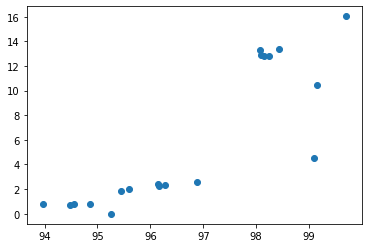

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(merged_df["Value"], merged_df["% of Population"])
print("Pearson correlation value :", merged_df["Value"].corr(merged_df["% of Population"])) # uses pearson as default
print("Spearman correlation value :", merged_df["Value"].corr(merged_df["% of Population"], method = 'spearman'))
print("Kendall correlation value :", merged_df["Value"].corr(merged_df["% of Population"], method = 'kendall'))

Judging from the scatter graph, both the Pearson (P) and Spearman (S) value make sense. Since P measures linear relationship (typically on an interval scale, 1,2,3) and S measures monotonic relationship (typicaly more on ordinal scale, such as rating), S>P implies the relationship is more monotonic (albeit slightly) than linear. Furthermore, assumptions such as constant variance

Returning to our original hypothesis, it can be interpreted as follow:
<br>
$H_{0}$ : **$P = 0$**

$H_{1}$ : **$P \neq 0$**
<br>
$Degree of freedom = 19 - 2 = 17$. We take off 2 because we used two data points (each from literacy and % foreign born) to predict mean of literacy data and mean of % population data
<br>
<br>
In order to calculate the t-statistics, we could use the following formula:
<br>
<br>
$t = \dfrac{r^2 \sqrt{n-2}}{\sqrt{1-r^2}}$ which is $t = \dfrac{0.86 \sqrt{19-2}}{\sqrt{1-0.86^2}} = 6.95$

Upon looking up a t-distribution table for two-tailed test and test-statistic, $t$ of $6.95$, the p-value is $1.17E-6$
<br>
<br>
For an alpha value of 0.05 (even 0.01), we reject the null hypothesis and conclude that

## There is sufficient evidence to conclude that there is a significant linear relationship between literacy rate and % foreign-born population because the correlation coefficient is significantly different from zero.